In [33]:
import pandas as pd 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import umap.umap_ as umap
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder

In [23]:
# load data 

data = pd.read_csv ("../data/scaled_data_v3.csv", index_col=0)
y = pd.read_csv("../data/labels_v3.csv", index_col = 0)
# split data 
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.2, random_state=1210)


# no need to standardize feature because already scaled

In [35]:
UMAP= umap.UMAP()
umap_red= UMAP.fit_transform(data)

labels = y['Response'].values
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


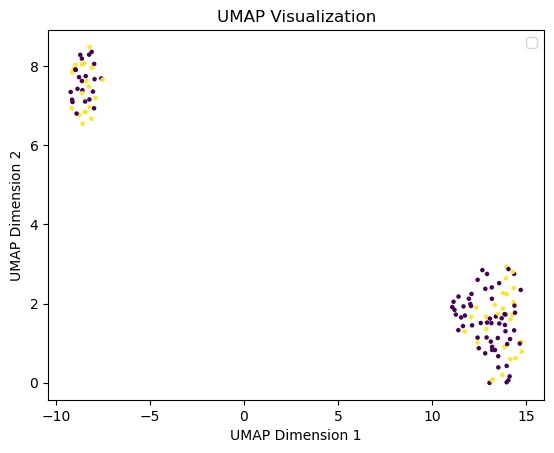

In [39]:
scatter = plt.scatter(umap_red[:, 0], umap_red[:, 1], c=labels_encoded, cmap='viridis', s=5)
plt.legend(handles=scatter.legend_elements()[0], labels=['Label 0', 'Label 1'], title='Labels')
plt.legend()
plt.title('UMAP Visualization')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

In [42]:
# to find the two populations 
filtered_points = [index for index, value in enumerate(umap_red[:, 0]) if value > 10]
label_data = pd.read_csv ("../data/log2_data_v3.csv", index_col=0)
og_data_names = label_data.index[filtered_points].tolist()
# print(imputed_data.head())
# og_data_names = [PCA_mapping[index] for index in filtered_points]

print(og_data_names)

['SRR7344546', 'SRR7344554', 'SRR7344556', 'SRR7344564', 'SRR7344565', 'SRR7344567', 'SRR7344574', 'SRR7344575', 'SRR3184279', 'SRR3184280', 'SRR3184281', 'SRR3184282', 'SRR3184283', 'SRR3184284', 'SRR3184285', 'SRR3184286', 'SRR3184287', 'SRR3184288', 'SRR3184289', 'SRR3184290', 'SRR3184291', 'SRR3184293', 'SRR3184294', 'SRR3184295', 'SRR3184296', 'SRR3184297', 'SRR3184298', 'SRR3184299', 'SRR3184300', 'SRR3184301', 'SRR3184302', 'SRR3184303', 'SRR3184304', 'SRR3184305', 'SRR3184306', 'SRR5088813', 'SRR5088815', 'SRR5088819', 'SRR5088821', 'SRR5088822', 'SRR5088824', 'SRR5088826', 'SRR5088829', 'SRR5088831', 'SRR5088834', 'SRR5088836', 'SRR5088839', 'SRR5088840', 'SRR5088843', 'SRR5088846', 'SRR5088849', 'SRR5088850', 'SRR5088853', 'SRR5088856', 'SRR5088857', 'SRR5088861', 'SRR5088864', 'SRR5088866', 'SRR5088867', 'SRR5088872', 'SRR5088878', 'SRR5088880', 'SRR5088883', 'SRR5088885', 'SRR5088887', 'SRR5088890', 'SRR5088891', 'SRR5088895', 'SRR5088897', 'SRR5088898', 'SRR5088900', 'SRR5

In [14]:
hyperparameters = {
    'C': [0.1, 1, 10, 100, 1000],
    'solver': ['liblinear', 'saga']
}

In [17]:
grid_search = GridSearchCV(LogisticRegression(penalty="l1"), hyperparameters,  cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

#best hyperparameters 
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

/Users/eveyzheng/LMP1210_2024/.conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/eveyzheng/LMP1210_2024/.conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/eveyzheng/LMP1210_2024/.conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/eveyzheng/LMP1210_2024/.conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-v

In [20]:
test_accuracy = best_model.score(X_test, y_test)
y_pred = best_model.predict(X_train)
training_accuracy = accuracy_score(y_pred, y_train)
print("Best hyperparameters:", best_params)
print("Test set accuracy:", test_accuracy)
print("Training accuracy:", training_accuracy)

Best hyperparameters: {'C': 0.1, 'solver': 'liblinear'}
Test set accuracy: 0.56
Training accuracy: 0.93


overfitting to training set?